In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "SHOP"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,1.700000,1.700000,1.700000,1.700000,1.700000,0
2015-05-21,2.800000,2.874000,2.411000,2.568000,2.568000,123039000
2015-05-22,2.607000,3.110000,2.600000,2.831000,2.831000,28412000
2015-05-26,2.980000,3.034000,2.908000,2.965000,2.965000,8202000
2015-05-27,3.067000,3.081000,2.700000,2.750000,2.750000,7976000
...,...,...,...,...,...,...
2023-05-02,46.869999,47.630001,46.080002,46.779999,46.779999,11255000
2023-05-03,46.799999,47.970001,46.189999,46.270000,46.270000,15472700
2023-05-04,54.869999,59.820000,53.880001,57.299999,57.299999,88927300


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2006 entries, 2015-05-20 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2006 non-null   float64
 1   High       2006 non-null   float64
 2   Low        2006 non-null   float64
 3   Close      2006 non-null   float64
 4   Adj Close  2006 non-null   float64
 5   Volume     2006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.7 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,1.700,1.700,1.700,1.700,1.700,0
2015-05-21,2.800,2.874,2.411,2.568,2.568,123039000
2015-05-22,2.607,3.110,2.600,2.831,2.831,28412000
2015-05-26,2.980,3.034,2.908,2.965,2.965,8202000
2015-05-27,3.067,3.081,2.700,2.750,2.750,7976000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,46.869999,47.630001,46.080002,46.779999,46.779999,11255000
2023-05-03,46.799999,47.970001,46.189999,46.270000,46.270000,15472700
2023-05-04,54.869999,59.820000,53.880001,57.299999,57.299999,88927300
2023-05-05,57.299999,62.539001,57.020000,62.029999,62.029999,43079500
2023-05-08,61.599998,65.129997,61.290001,64.379997,64.379997,37053400


In [7]:
data.shape

(2006, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2.006000e+03
mean,42.106469,43.080807,41.055140,42.098155,42.098155,1.808235e+07
std,45.267941,46.175509,44.185585,45.192925,45.192925,1.524791e+07
min,1.700000,1.700000,1.700000,1.700000,1.700000,0.000000e+00
25%,8.705250,8.839250,8.497750,8.690750,8.690750,9.044500e+06
50%,25.894000,26.570000,25.441000,26.106500,26.106500,1.446850e+07
75%,57.199499,59.467502,54.449751,57.788250,57.788250,2.282725e+07
max,171.800003,176.291794,168.509506,169.059998,169.059998,2.089590e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

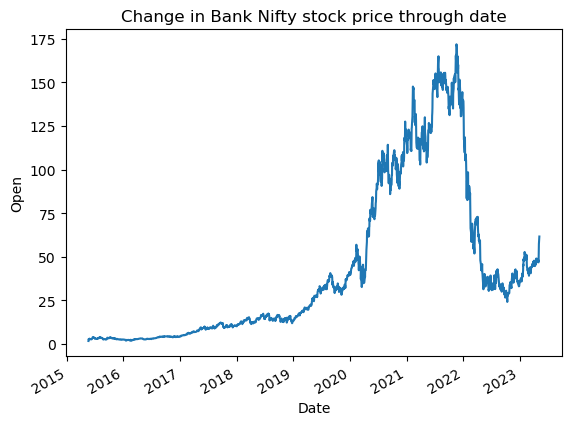

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1504, 3), (502, 3))

In [15]:
y_train.shape,y_test.shape

((1504,), (502,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 12.48950013 154.75217712   2.28071001  63.62877987  35.17052975
  14.58335019  14.49123005  35.74219906 124.05962082  92.48177902
   6.73262008  13.67323994   3.03396998   3.15558003   2.62286997
   2.56667997  96.08820053  97.94915009  27.50781004 112.96540024
   3.88604996   2.65884002 150.33790985  10.16806002   4.28087993
  39.27080029  60.8671693    9.30403011 138.42378784  14.34907024
 104.04828949  14.06771006   3.84728996   9.78120989   3.53273999
   3.07726996  71.38956078 115.79031914  39.07038879   4.03592001
   2.66558002 148.61245667   3.20206995  61.88599003   3.08060995
  13.62247996   2.63956005  12.41286996   9.12496017  45.39367981
 102.58312149  30.89047029  14.93159009 106.00401031 101.28195114
   2.71700995   9.30046998   4.29334997  13.57140001  48.03926994
  53.29884033   9.85150002  17.3357695   32.98957941  12.17899994
 109.51119919 110.18050102  39.04892914   4.74971      4.32604007
 148.94912781  99.72251884  12.46112984   4.23262991 120.70565948
  91.99059

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9994165723834597


In [22]:
y_test=list(y_test)

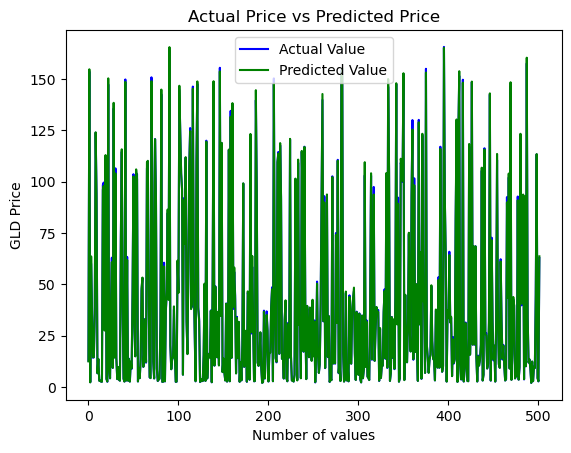

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

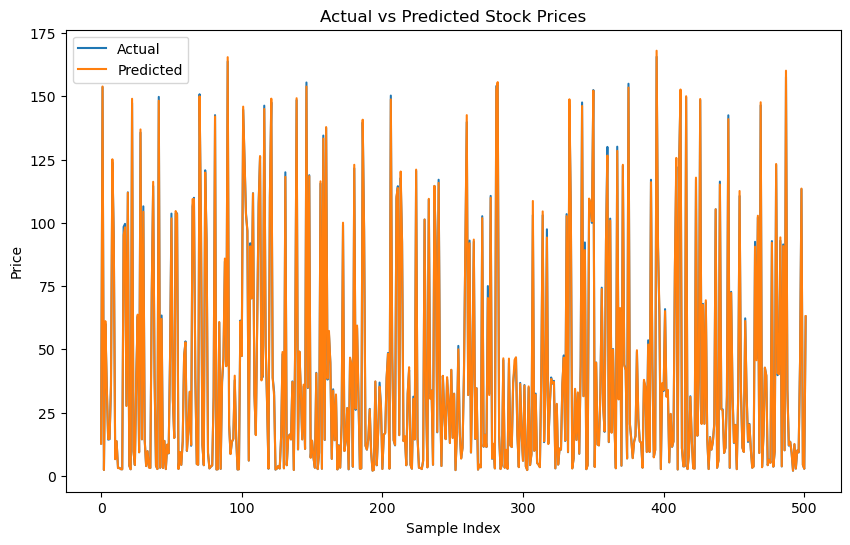

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 1.69020201,  2.55390759,  3.03514799, ..., 58.4066675 ,
       61.63740504, 64.39921129])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value324
enter a value324
enter a value234
255.61430785646064


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("SHOP_model.pkl",'wb')
pickle.dump(model,file)